In [40]:
import cv2                         
import numpy as np                 
import matplotlib.pyplot as plt    
%matplotlib inline

In [41]:
def show_image(img, title, colorspace):
    dpi = 96
    figsize = (img.shape[1] / dpi, img.shape[0] / dpi)
    fig, ax = plt.subplots(figsize = figsize, dpi = dpi)
    if colorspace == 'RGB':
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation = 'spline16')
    if colorspace == 'gray':
        plt.imshow(img, cmap = 'gray')
    plt.title(title, fontsize = 12)
    ax.axis('off')
    plt.show()   

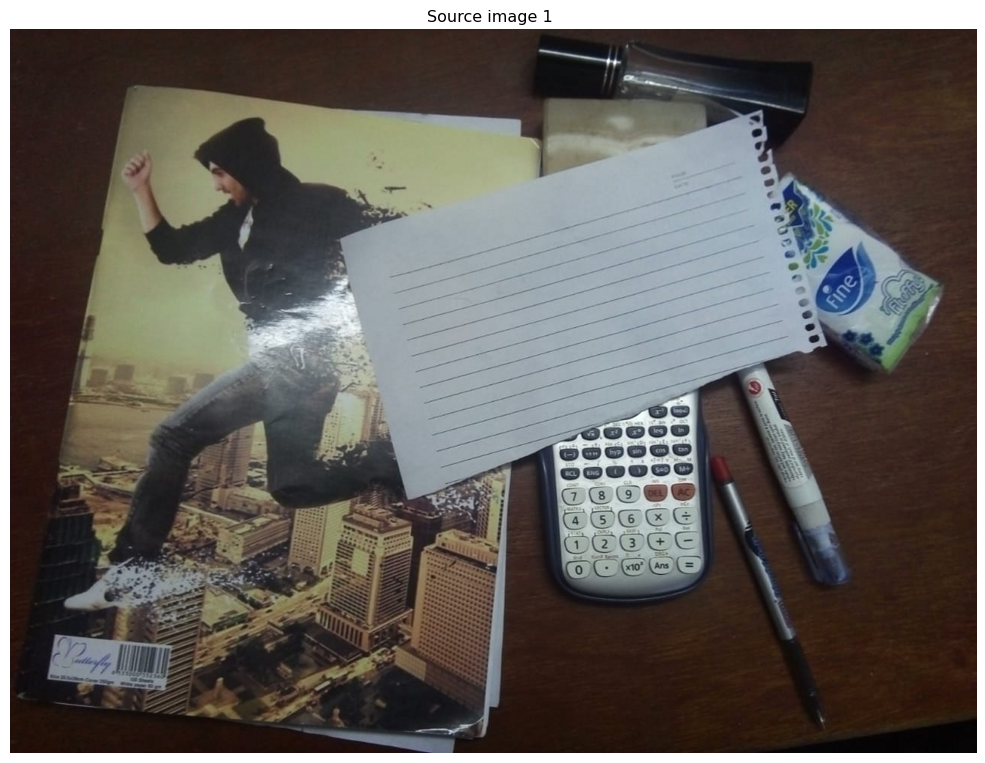

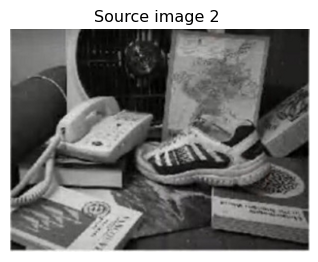

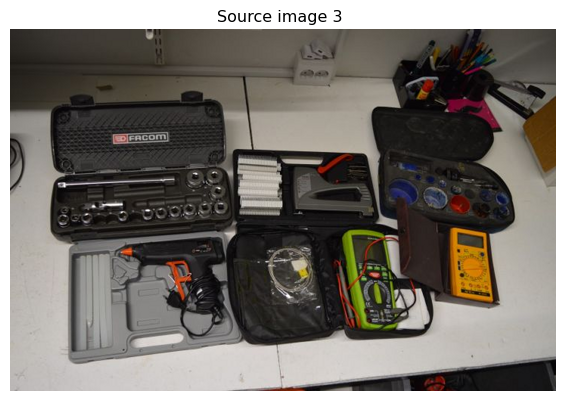

In [34]:
src_img = cv2.imread('calc2.jpg')
show_image(src_img, 'Source image 1 ', 'RGB')

src_img = cv2.imread('bigx.jpg')
show_image(src_img, 'Source image 2 ', 'RGB')

src_img = cv2.imread('xxx.jpeg')
show_image(src_img, 'Source image 3 ', 'RGB')


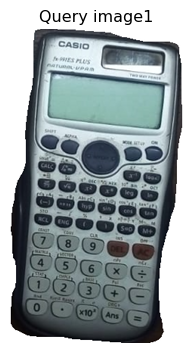

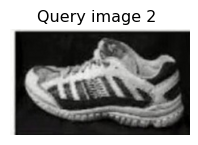

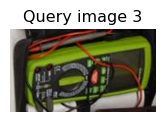

In [35]:

query_img = cv2.imread('calc3.png')
show_image(query_img, 'Query image1', 'RGB')

query_img1 = cv2.imread('x3.jpg')
show_image(query_img1, 'Query image 2 ', 'RGB')

query_img2 = cv2.imread('x1.png')
show_image(query_img2, 'Query image 3', 'RGB')

In [36]:
def feature(query_img):
    sift = cv2.SIFT_create()



    features = sift.detect(query_img, None)
    f_img = cv2.drawKeypoints(query_img, features, None, color = (0, 255, 0), flags = 0)


    show_image(f_img, 'Detected features', 'RGB')
    

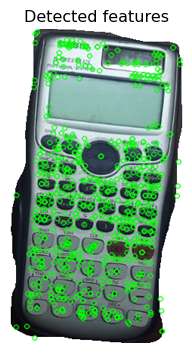

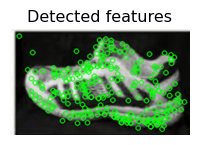

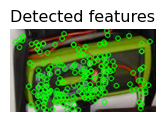

In [37]:
feature(query_img)
feature(query_img1)
feature(query_img2)

In [38]:

def find_object(query_img, train_img, min_matches): 

    sift = cv2.SIFT_create()
    features1, des1 = sift.detectAndCompute(query_img, None)
    features2, des2 = sift.detectAndCompute(train_img, None)

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)
    
    
    
    good = []    
    good_without_lists = []    
    matches = [match for match in matches if len(match) == 2] 
    for m, n in matches:
        if m.distance < 0.8 * n.distance:
            good.append([m])
            good_without_lists.append(m)
         
    if len(good) >= min_matches:
        src_pts = np.float32([features1[m.queryIdx].pt for m in good_without_lists]).reshape(-1, 1, 2)
        dst_pts = np.float32([features2[m.trainIdx].pt for m in good_without_lists]).reshape(-1, 1, 2)
        
       
        M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
               
        h, w = query_img.shape[:2]
        pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
        dst = cv2.perspectiveTransform(pts, M)
        
        train_img = cv2.polylines(train_img, [np.int32(dst)], True, (0, 255, 0), 2, cv2.LINE_AA)
    else:
        print('not good matches are found')
            
    show_image(train_img, 'object finder', 'RGB')

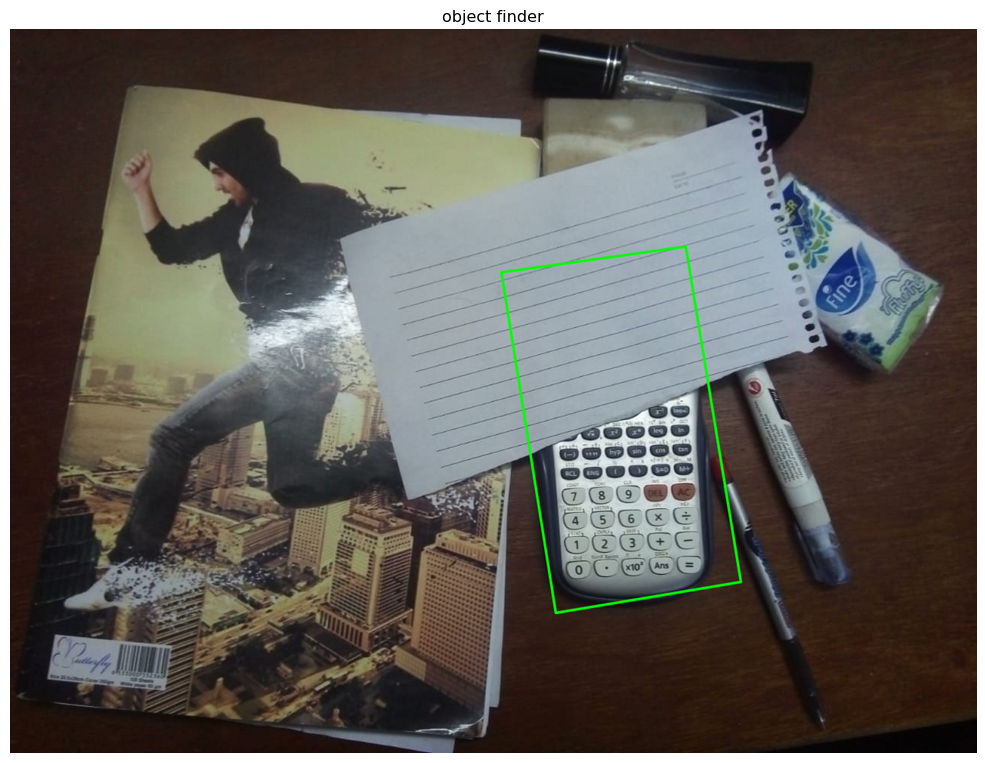

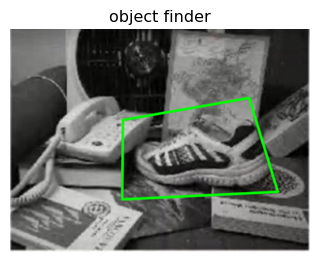

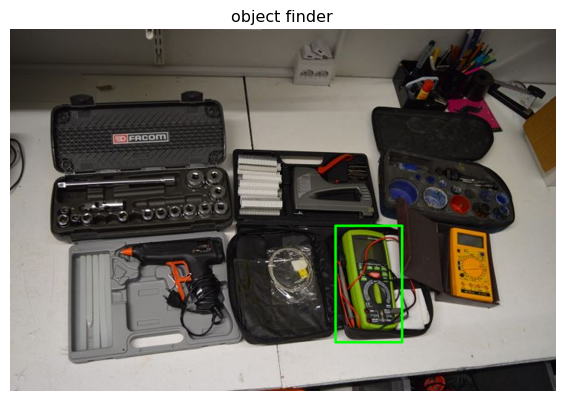

In [39]:
train_img = cv2.imread('calc2.jpg')
find_object(query_img, train_img, 10)

train_img1 = cv2.imread('bigx.jpg')
find_object(query_img1, train_img1, 10)

train_img2 = cv2.imread('xxx.jpeg')
find_object(query_img2, train_img2, 10)